In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
df = pd.read_csv('bol_sales_holdout.csv')
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_67,male,10813,4.8,10,41,107,470
1,person_68,male,56724,13.2,12,52,0,1219
2,person_69,male,11476,9.0,2,16,120,360
3,person_70,male,37781,11.4,15,56,134,1091
4,person_71,male,26179,9.4,14,50,92,879


In [18]:
dummies = pd.get_dummies(df['gender'])
df_dummie = pd.concat([df,dummies], axis=1)
df_dummie.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,female,male
0,person_67,male,10813,4.8,10,41,107,470,0,1
1,person_68,male,56724,13.2,12,52,0,1219,0,1
2,person_69,male,11476,9.0,2,16,120,360,0,1
3,person_70,male,37781,11.4,15,56,134,1091,0,1
4,person_71,male,26179,9.4,14,50,92,879,0,1


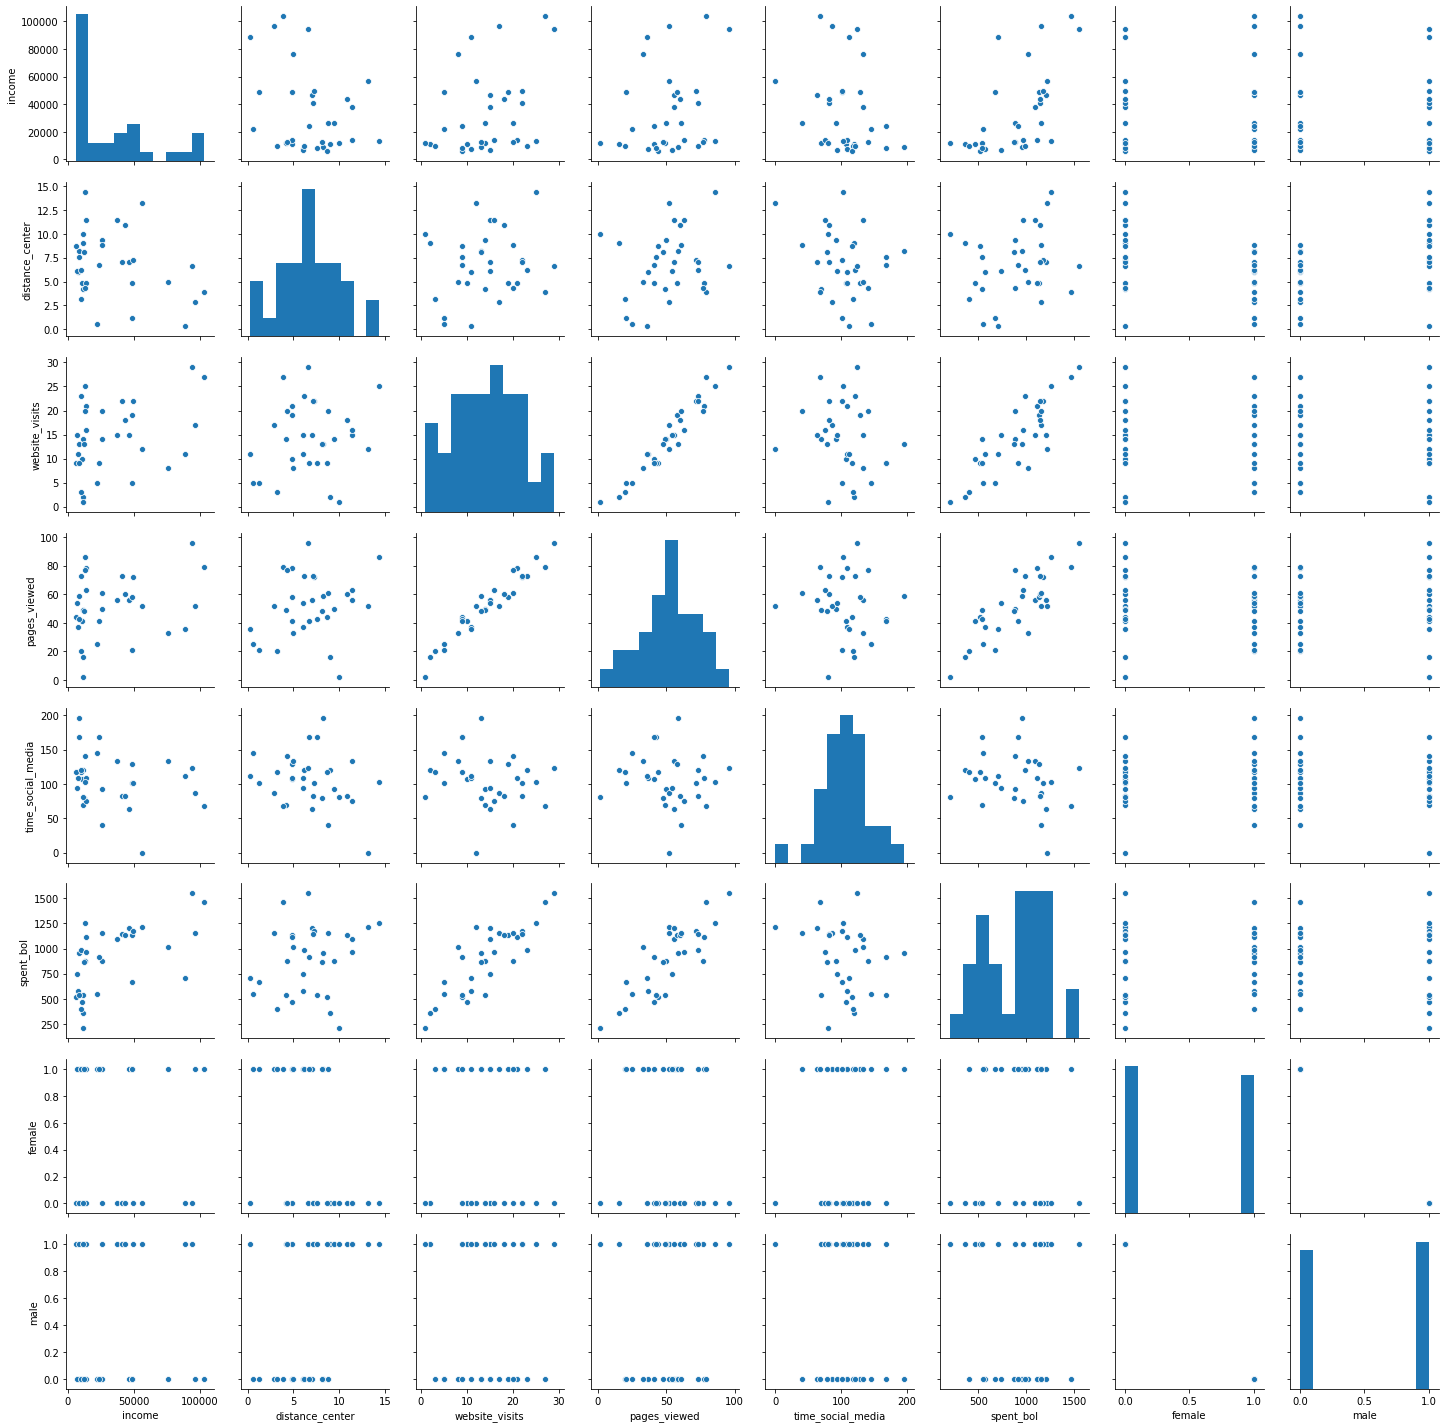

In [19]:
sns.pairplot(df_dummie)
plt.show() #using Matplotlib to show the plot

In [20]:
df_subset = df_dummie[['distance_center', 'website_visits', 'pages_viewed', 'income', 'female', 'male']]
df_subset.head()

,distance_center,website_visits,pages_viewed,income,female,male
0,4.8,10,41,10813,0,1
1,13.2,12,52,56724,0,1
2,9.0,2,16,11476,0,1
3,11.4,15,56,37781,0,1
4,9.4,14,50,26179,0,1


In [21]:
y = df_dummie['spent_bol'] #We need to take out the spent_bol as our Y-variable
X = df_subset
X.index = df_dummie['id']
X.head()

,distance_center,website_visits,pages_viewed,income,female,male
id,,,,,,
person_67,4.8,10,41,10813,0,1
person_68,13.2,12,52,56724,0,1
person_69,9.0,2,16,11476,0,1
person_70,11.4,15,56,37781,0,1
person_71,9.4,14,50,26179,0,1


In [22]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data into training and test set, store it into different variables
#X_train.head() #show the train data

In [24]:
lm = LinearRegression() #create the model
model = lm.fit(X, y) #train the model

In [26]:
y_pred = lm.predict(X) #generate the predictions
resid = y_pred - y #get the residuals by substracting the prediction

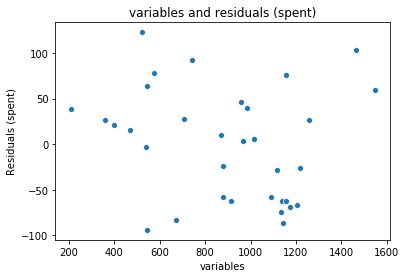

In [27]:
sns.scatterplot(x=y,y=resid, data=df_dummie)
plt.xlabel("variables")
plt.ylabel('Residuals (spent)')
plt.title('variables and residuals (spent)')
plt.show()

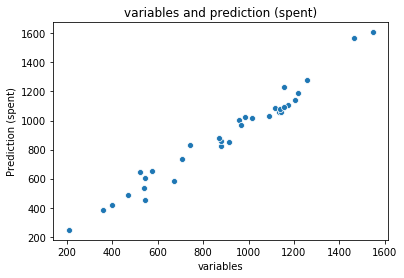

In [28]:
sns.scatterplot(x=y,y=y_pred, data=df_dummie)
plt.xlabel("variables")
plt.ylabel('Prediction (spent)')
plt.title('variables and prediction (spent)')
plt.show()

In [29]:
y_test_p = lm.predict(X) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y, y_test_p)

0.9656981239228786

In [30]:
math.sqrt(mean_squared_error(y, y_test_p)) #calculate the RMSE

60.37845407625733

The RMSE is 60. Which means that we are typically about 60 off in our predicted spent.

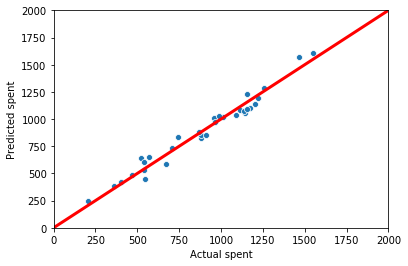

In [32]:
sns.scatterplot(y, y_test_p)
plt.xlabel('Actual spent')
plt.ylabel('Predicted spent')
plt.xlim([0,2000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,2000])
plt.plot([0,2000], [0,2000], color='red', lw=3) #Plot a diagonal length
plt.show()